In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from tensorflow.keras.layers import InputLayer, Dense, Activation,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/Data Vortex_Round 2.csv')
df.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,DtCustomer,Education,Marital,...,MntFruits,MntSweetProducts,MntWines,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency
0,0,0,0,0,1,1,0,15-04-2008 19.34,High School,Single,...,1370,5284,12537,4839,13,5,4,12,25,94
1,1,0,1,0,1,0,1,18-01-1982 0.23,Professional,Single,...,4661,8616,8258,6089,2,3,13,12,8,3
2,1,1,0,0,0,1,0,26-08-1984 1.46,High School,Widowed,...,2954,9392,17066,7523,11,0,9,2,6,77
3,0,0,1,0,1,1,1,05-10-2010 21.28,None,Widowed,...,1972,235,8967,9349,11,13,20,9,6,1
4,1,1,1,1,1,0,0,10-03-1983 0.23,Professional,Single,...,7984,2723,191,3058,10,10,24,7,6,83


In [ ]:
df['Age'] = 0
for i in range(df.shape[0]):
  df['Age'][i] = 2023 - int(df['DtCustomer'][i][6:10])

df.head()

<ipython-input-263-5f2b9aa44ff8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][i] = 2023 - int(df['DtCustomer'][i][6:10])


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,DtCustomer,Education,Marital,...,MntSweetProducts,MntWines,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Age
0,0,0,0,0,1,1,0,15-04-2008 19.34,High School,Single,...,5284,12537,4839,13,5,4,12,25,94,15
1,1,0,1,0,1,0,1,18-01-1982 0.23,Professional,Single,...,8616,8258,6089,2,3,13,12,8,3,41
2,1,1,0,0,0,1,0,26-08-1984 1.46,High School,Widowed,...,9392,17066,7523,11,0,9,2,6,77,39
3,0,0,1,0,1,1,1,05-10-2010 21.28,None,Widowed,...,235,8967,9349,11,13,20,9,6,1,13
4,1,1,1,1,1,0,0,10-03-1983 0.23,Professional,Single,...,2723,191,3058,10,10,24,7,6,83,40


In [ ]:
df = df.drop('DtCustomer',axis=1)
df.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Education,Marital,Kidhome,...,MntSweetProducts,MntWines,MntGoldProds,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Age
0,0,0,0,0,1,1,0,High School,Single,2,...,5284,12537,4839,13,5,4,12,25,94,15
1,1,0,1,0,1,0,1,Professional,Single,2,...,8616,8258,6089,2,3,13,12,8,3,41
2,1,1,0,0,0,1,0,High School,Widowed,0,...,9392,17066,7523,11,0,9,2,6,77,39
3,0,0,1,0,1,1,1,None,Widowed,2,...,235,8967,9349,11,13,20,9,6,1,13
4,1,1,1,1,1,0,0,Professional,Single,0,...,2723,191,3058,10,10,24,7,6,83,40


In [ ]:
df['Marital'].unique()

array(['Single', 'Widowed', 'Married', 'Divorced', 'Separated'],
      dtype=object)

In [ ]:
df['Marital'].value_counts()

Widowed      462
Divorced     459
Single       430
Married      428
Separated    427
Name: Marital, dtype: int64

In [ ]:
df['Marital'] = df['Marital'].replace({'Single': 'Alone', 'Widowed': 'Alone', 'Divorced': 'Alone', 'Separated': 'Alone'})

In [ ]:
df['Education'].unique()

array(['High School', 'Professional', 'None', 'PhD', 'Masters',
       'Bachelors'], dtype=object)

In [ ]:
df['Education'].value_counts()

Masters         399
None            383
PhD             382
Bachelors       369
Professional    343
High School     330
Name: Education, dtype: int64

In [ ]:
df['Education'] = df['Education'].replace({'Bachelors': 'Degree', 'Masters': 'Degree', 'PhD': 'Degree', 'None': 'No Degree', 'High School': 'No Degree'})

In [ ]:
df['Child'] = df['Kidhome'] + df['Teenhome']

In [ ]:
df['Spending']=df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
df['Purchases'] = df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases'] + df['NumDealsPurchases']

In [ ]:
df["NumCmpResponce"] = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3",
                                 "AcceptedCmp4", "AcceptedCmp5", "Response"]].sum(axis=1)

In [ ]:
df = df[['Age', 'Education', 'Marital', 'Child', 'Income', 'Spending', 'Purchases', 'NumWebVisitsMonth', 'Recency', 'NumCmpResponce', 'Complain', 'Response']]
df.head()

,Age,Education,Marital,Child,Income,Spending,Purchases,NumWebVisitsMonth,Recency,NumCmpResponce,Complain,Response
0,15,No Degree,Alone,2,1626528,34674,34,25,94,2,0,1
1,41,Professional,Alone,2,805229,56677,30,8,3,3,1,0
2,39,No Degree,Alone,1,405141,51668,22,6,77,3,0,1
3,13,No Degree,Alone,2,731810,31544,53,6,1,3,1,1
4,40,Professional,Alone,2,1719028,37134,51,6,83,5,0,0


In [ ]:
df.isnull().sum()

Age                  0
Education            0
Marital              0
Child                0
Income               0
Spending             0
Purchases            0
NumWebVisitsMonth    0
Recency              0
AcceptedCmp1         0
AcceptedCmp2         0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
Complain             0
Response             0
dtype: int64

In [ ]:
%%capture
Education = df['Education'].unique()

for i in range(df.shape[0]):
  if df['Education'][i] == Education[0]:
    df['Education'][i] = 0
  elif df['Education'][i] == Education[1]:
    df['Education'][i] = 1
  else:
    df['Education'][i] = 2

In [ ]:
%%capture
Marital = df['Marital'].unique()

for i in range(df.shape[0]):
  if df['Marital'][i] == Marital[0]:
    df['Marital'][i] = 0
  else:
    df['Marital'][i] = 1

In [ ]:
df.head()

,Age,Education,Marital,Child,Income,Spending,Purchases,NumWebVisitsMonth,Recency,NumCmpResponce,Complain,Response
0,15,0,0,2,1626528,34674,34,25,94,2,0,1
1,41,1,0,2,805229,56677,30,8,3,3,1,0
2,39,0,0,1,405141,51668,22,6,77,3,0,1
3,13,0,0,2,731810,31544,53,6,1,3,1,1
4,40,1,0,2,1719028,37134,51,6,83,5,0,0


In [ ]:
x_data = df.iloc[:, df.columns != 'Response' ]
# x_data = df.iloc[:,:5]
y_data = df.iloc[:, df.columns == 'Response']

x_data.shape, y_data.shape

((2206, 11), (2206, 1))

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, random_state = 0, shuffle = True)

In [ ]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_x)
test_data=scaler.fit_transform(test_x)

XGBOOST CLASSIFIER

In [ ]:
model = XGBClassifier(n_estimators = 200, max_depth=3, subsample=0.8, learning_rate=0.01, gamma=0.01, colsample_bytree = 1, objective = "binary:logistic", random_state = 1)

model.fit(train_data, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.01,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
predict_train = model.predict(train_data)
predict_test = model.predict(test_data)

In [ ]:
train_acc = accuracy_score(train_y, predict_train)
test_acc = accuracy_score(test_y, predict_test)

train_acc, test_acc

In [ ]:
f1_score(train_y, predict_train)

In [ ]:
f1_score(test_y, predict_test)

In [ ]:
conf_mat = confusion_matrix(test_y, predict_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['NO', 'YES'])
cm_display.plot()
plt.show()

NEURAL NETWORK

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 512, activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(train_data, train_y, epochs = 30)

Epoch 1/30
56/56 [==============================] - 2s 10ms/step - loss: 0.6797 - accuracy: 0.5896
Epoch 2/30
56/56 [==============================] - 1s 10ms/step - loss: 0.6279 - accuracy: 0.6797
Epoch 3/30
56/56 [==============================] - 1s 10ms/step - loss: 0.5849 - accuracy: 0.6933
Epoch 4/30
56/56 [==============================] - 1s 10ms/step - loss: 0.5782 - accuracy: 0.6871
Epoch 5/30
56/56 [==============================] - 1s 10ms/step - loss: 0.5770 - accuracy: 0.7052
Epoch 6/30
56/56 [==============================] - 1s 10ms/step - loss: 0.5681 - accuracy: 0.7080
Epoch 7/30
56/56 [==============================] - 1s 10ms/step - loss: 0.5663 - accuracy: 0.7103
Epoch 8/30
56/56 [==============================] - 1s 10ms/step - loss: 0.5603 - accuracy: 0.7075
Epoch 9/30
56/56 [==============================] - 1s 10ms/step - loss: 0.5535 - accuracy: 0.7132
Epoch 10/30
56/56 [==============================] - 1s 10ms/step - loss: 0.5480 - accuracy: 0.7262
Epoch 11/

In [ ]:
predict_train = classifier.predict(train_data)
predict_test = classifier.predict(test_data)

14/14 [==============================] - 0s 3ms/step


In [ ]:
for i in range(predict_train.shape[0]):
  if predict_train[i]>0.6:
    predict_train[i] = 1
  else:
    predict_train[i] = 0

for i in range(predict_test.shape[0]):
  if predict_test[i]>0.6:
    predict_test[i] = 1
  else:
    predict_test[i] = 0

In [ ]:
train_acc = accuracy_score(train_y, predict_train)
test_acc = accuracy_score(test_y, predict_test)

train_acc, test_acc

(0.8854875283446711, 0.6515837104072398)

In [ ]:
f1_score(train_y, predict_train)

0.8839080459770114

In [ ]:
f1_score(test_y, predict_test)

0.6484018264840182

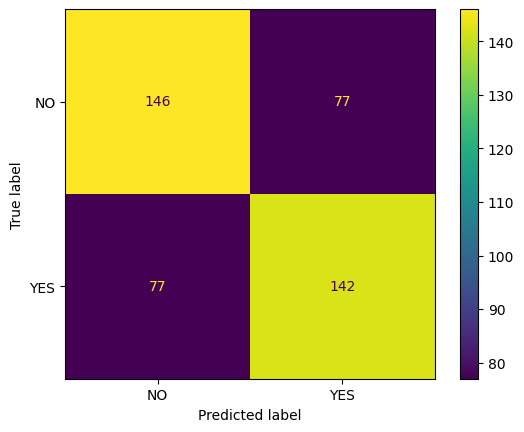

In [ ]:
conf_mat = confusion_matrix(test_y, predict_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['NO', 'YES'])
cm_display.plot()
plt.show()

LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression()

# Train the model
model.fit(train_x, train_y)

# Make predictions on the test set
y_pred = model.predict(test_x)

# Evaluate the model
print("Accuracy:", accuracy_score(test_y, y_pred))
print("Classification Report:")
print(classification_report(test_y, y_pred))

Accuracy: 0.5113122171945701
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.82      0.63       223
           1       0.52      0.20      0.29       219

    accuracy                           0.51       442
   macro avg       0.51      0.51      0.46       442
weighted avg       0.51      0.51      0.46       442



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k=2
neigh=KNeighborsClassifier(n_neighbors=k).fit(train_x,train_y)
yhat=neigh.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(train_y, neigh.predict(train_x)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, yhat))

Train set Accuracy:  0.7448979591836735
Test set Accuracy:  0.49547511312217196
